# AnyoneAI - Project II

# Making Estimations with our NBA dataset

In our first project, we learn how to create our own datasets by using a public API, Python and Pandas. We're now going to explore how to make predictive models for regression and classification tasks using ScikitLearn

The goals of this project are:
- Learn how to define a prediction task
- Selecting evaluation metrics and baseline models
- Perform feature engineering and standarization
- Training and using predictive models: Univariable and Multivariate Linear Regression, Classification
- Understand how Gradient Descent works by implementing a Linear Regressor in python

## Using Regression Models to Estimate players Salaries

A player's salary can be explained by a lot of factors: 

- Years in the league: NBA contracts are limited in price, players have caps on how much money they make depending on their years playing in the league
- Age: Highly correlated to the previous one, NBA players have a minimun age of 19 years
- Draft position: players out of USA universities are selected each year through a process called draft, in which each team selects a player in a predefined order for 2 rounds (meaning only 60 players are drafted each year). A rookie contract value depends on the draft position. (Undrafted players have to negotiate a salary independently)
- Performance in statistical categories: after the rookie contract, players can negotiate freely with teams, and usually statistical categories like points, rebounds and assists are extremely important.  
- Team: Even though there are limits to what all teams can expend in players salary, they all allocate their resources differently, and can be more willing to pay the penalties incurred by exceeding those limitations.
- Year in which the contract was signed: the mininum and maximum values of contracts possibles in the NBA changes depending on league revenue (television contracts, sponsorships, etc), so if the amount of money the teams make increases, players can negotiate bigger contracts.
- Intangibles: players can be valued also in things that are not easily translated to a statistic, good defensive players might not always have great stats but can be extremely important for a team, the same can be said about veteran players that help young ones to learn and are good locker-room guys.

But we're going to take a simplified approach, we'll try to use the data we already have to make the best estimator possible, and then we will analyze what went right and what could've gone wrong with our results.

In [845]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import SGDRegressor, LogisticRegression
from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeRegressor
sns.set_theme()
sns.set(rc = {'figure.figsize':(8,7)})

### Analyzing our data

In [846]:
data = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/project2_players_df.csv")
data.dropna(subset=["PTS","TEAM_NAME"], inplace=True)

In [847]:
data.head()

,PERSON_ID,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,Salary,AGE
0,1630173,Precious Achiuwa,Raptors,Forward,203,102,Nigeria,1999-09-19,1,20,115.0,17.3,6.5,5.1,0.8,0.4,0.5,2022-03-06,2711280,"22 years, 5 months, 25 days"
1,203500,Steven Adams,Grizzlies,Center,211,120,New Zealand,1993-07-20,8,12,648.0,26.8,9.3,7.9,1.4,0.9,0.9,2022-03-06,17073171,"28 years, 7 months, 24 days"
2,1628389,Bam Adebayo,Heat,Center,206,116,USA,1997-07-18,4,14,326.0,28.0,13.2,8.2,3.5,1.0,0.9,2022-03-07,28103550,"24 years, 7 months, 26 days"
3,1630583,Santi Aldama,Grizzlies,Forward,211,98,Spain,2001-01-10,0,30,27.0,10.2,3.3,2.4,0.5,0.1,0.3,2022-03-06,1994520,"21 years, 2 months, 6 days"
4,200746,LaMarcus Aldridge,Nets,Center,211,113,USA,1985-07-19,15,2,1073.0,33.7,19.1,8.1,1.9,0.7,1.1,2022-03-06,2641691,"36 years, 7 months, 25 days"


In [848]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PERSON_ID     437 non-null    int64  
 1   PLAYER_NAME   437 non-null    object 
 2   TEAM_NAME     437 non-null    object 
 3   POSITION      437 non-null    object 
 4   HEIGHT        437 non-null    int64  
 5   WEIGHT        437 non-null    int64  
 6   COUNTRY       437 non-null    object 
 7   BIRTHDATE     437 non-null    object 
 8   SEASON_EXP    437 non-null    int64  
 9   DRAFT_NUMBER  435 non-null    object 
 10  GP            437 non-null    float64
 11  MIN           437 non-null    float64
 12  PTS           437 non-null    float64
 13  REB           437 non-null    float64
 14  AST           437 non-null    float64
 15  STL           437 non-null    float64
 16  BLK           437 non-null    float64
 17  GAME_DATE     436 non-null    object 
 18  Salary        437 non-null    

Let's have another look at our previously generated dataset. 

1.1. Plot all players statistics ("PTS", "REB", "AST","STL","BLK") against salary

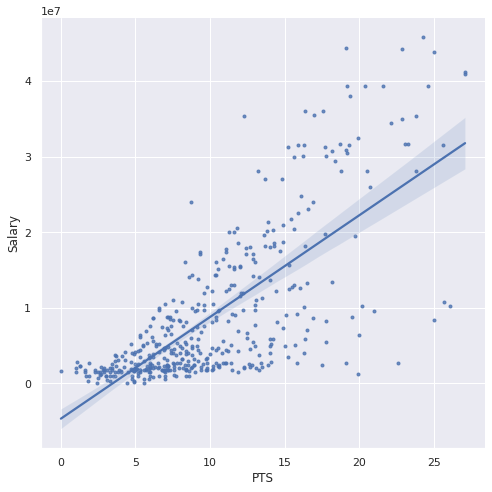

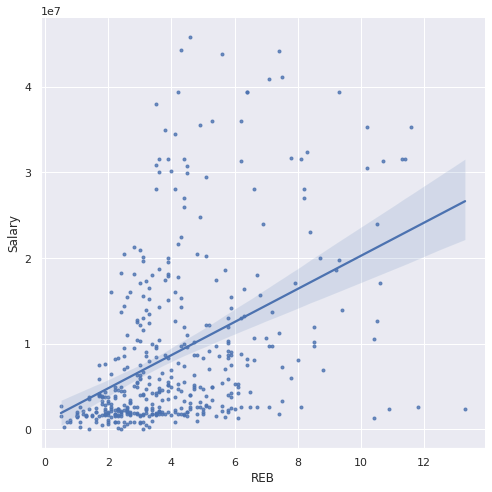

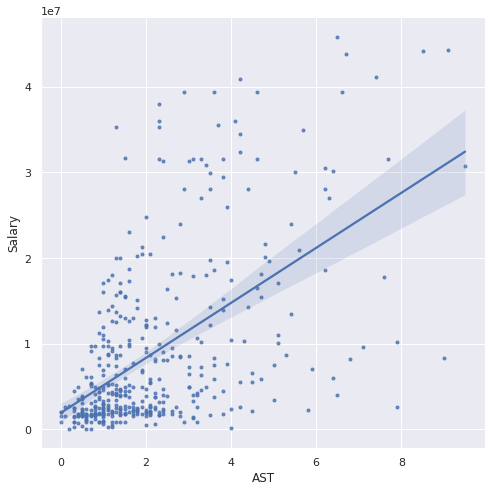

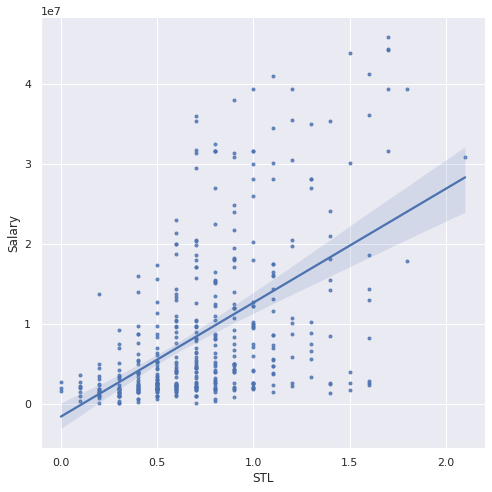

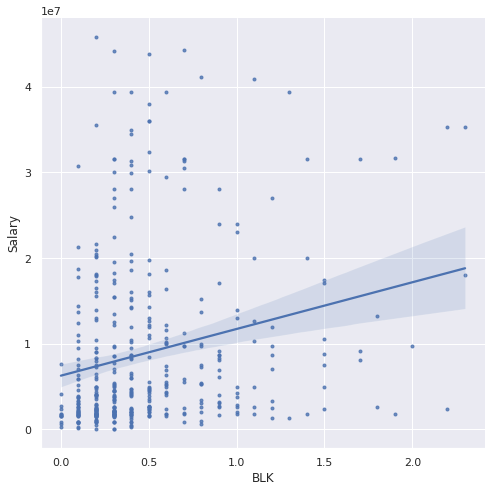

In [849]:
sns.lmplot(data=data, x="PTS", y="Salary", markers=".", height=7, aspect=1)
sns.lmplot(data=data, x="REB", y="Salary", markers=".", height=7, aspect=1)
sns.lmplot(data=data, x="AST", y="Salary", markers=".", height=7, aspect=1)
sns.lmplot(data=data, x="STL", y="Salary", markers=".", height=7, aspect=1)
sns.lmplot(data=data, x="BLK", y="Salary", markers=".", height=7, aspect=1)
sns.set(rc = {'figure.figsize':(9,7)})
plt.show()

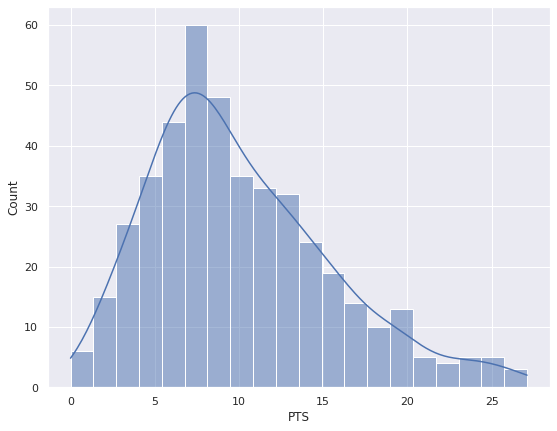

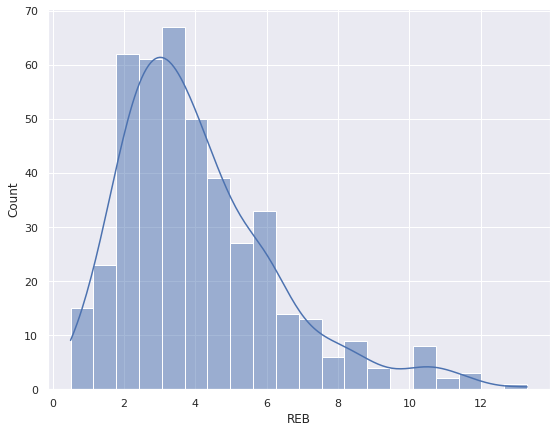

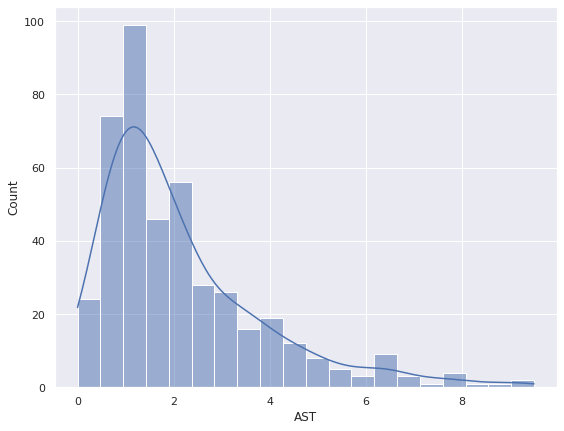

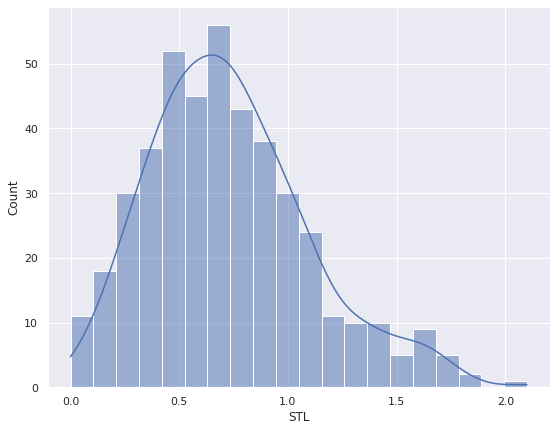

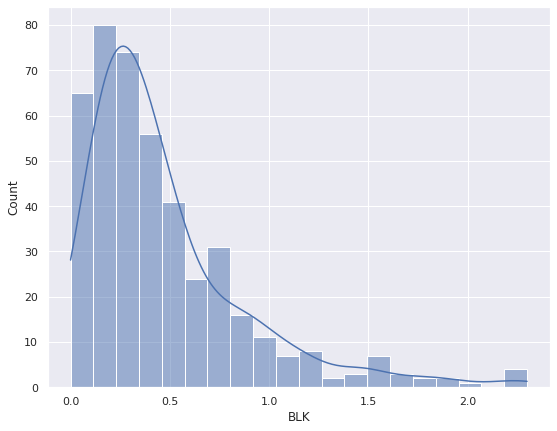

In [850]:
sns.histplot(data=data, x="PTS", bins=20, kde=True)
plt.show()
sns.histplot(data=data, x="REB", bins=20, kde=True)
plt.show()
sns.histplot(data=data, x="AST", bins=20, kde=True)
plt.show()
sns.histplot(data=data, x="STL", bins=20, kde=True)
plt.show()
sns.histplot(data=data, x="BLK", bins=20, kde=True)
plt.show()

1.2. What can we say about these distributions?

As we can see in the previous graphics the column PTS(points) its the one more correlated with the salary of the player, and also it's the one with a distribution more normal

### Splitting the Dataset

1.3. Split the dataset into train and testing sets. Use the Sklearn function for train/test splitting. Make sure to set the random state for reproducibility.

In [851]:
target= "Salary"
features = data.columns.drop("Salary").values
y = data[target]
X = data[features]

In [852]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=8)

### Baseline Model and Evaluation Metric

In every project, we need a baseline model that implements a very simple algorithm or heuristic so we can compare our results with it. 
In this case, we could create a function that always returns the average player salary, evaluate that, and then compare the result with our modeling to see if we are improving. 

We need an evaluation metric to see how well our models fit the data. For this project we will use [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error) as our regression evaluation metric, because it is a really simple metric to interpret. A lower value means the model performs better. 

For this particular problem, we will always round the value, as we don't need decimals for this task.

1.4. Create a Baseline model class that implements  fit() and predict() methods. As this model will not consider any other variable, the fit method should only receive a list of all players salaries. The predict method should receive and iterable and return a numpy array with the same length but every element should have the same value (the average salary)

In [853]:
class BaselineModel():
    """A baseline model that always returns the same value, the mean of the players salary in the train data"""
    
    def fit(self, y_train):
        """
        Fit the training data. 
        
        Parameters
        ----------
        y_train: Union[pd.Series, np.ndarray]
            a pandas series or numpy array containing salary information
        """
        self.mean_value = round(np.mean(y_train),0)
    
    def predict(self, X):
        """
        Predict salaries 
        
        Parameters
        ----------
        X: Union[pd.DataFrame, pd.Series, np.ndarray]
            a pandas series, dataframe or numpy array with the 
            
        Returns
        -------
        np.ndarray
            a numpy array of the same length as X, with all elements equal to the mean salary calculated in fit()
        """
        cant_pred = len(X)
        pred = np.zeros(cant_pred)
        pred.fill(self.mean_value)
        pred = pred.astype(int)
        return pred

In [854]:
mean_pred =  BaselineModel()

In [855]:
mean_pred.fit(y_train)

In [856]:
baseline_pred = mean_pred.predict(X_test)
baseline_pred

array([9183697, 9183697, 9183697, 9183697, 9183697, 9183697, 9183697,
       9183697, 9183697, 9183697, 9183697, 9183697, 9183697, 9183697,
       9183697, 9183697, 9183697, 9183697, 9183697, 9183697, 9183697,
       9183697, 9183697, 9183697, 9183697, 9183697, 9183697, 9183697,
       9183697, 9183697, 9183697, 9183697, 9183697, 9183697, 9183697,
       9183697, 9183697, 9183697, 9183697, 9183697, 9183697, 9183697,
       9183697, 9183697])

1.5. Evaluate the performance of our BaselineModel on the test set using mean_absolute_error from Sklearn (round the result)

In [857]:
baseline_mae = int(round(mean_absolute_error(y_test, baseline_pred)))
baseline_mae

6716417

### Regression with a single variable

You're now going to start modeling data. We will start with a really simple approach, selecting just one variable, and doing a regression to see if we improve upon our baseline.


1.6. Select the variable you think would provide the best fit. Perform feature scaling on this variable using a Sklearn scaler.

In [858]:
x_train = X_train["PTS"]
x_test = X_test["PTS"]
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [859]:
x_train[:6]

array([[ 5.8],
       [11.1],
       [13.4],
       [19.1],
       [ 9.1],
       [ 9.6]])

In [860]:
sf_sacler = MinMaxScaler()

In [861]:
sf_sacler.fit(x_train)

MinMaxScaler()

In [862]:
x_train = sf_sacler.transform(x_train)
x_test = sf_sacler.transform(x_test)

In [863]:
x_train[:6]

array([[0.21402214],
       [0.4095941 ],
       [0.49446494],
       [0.70479705],
       [0.33579336],
       [0.35424354]])

1.7. Train a model with [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) from Sklearn using the default parameters. Evaluate the model's performance on the test set using the selected metric.

In [864]:
sgd_default_model = SGDRegressor(random_state=8)

In [865]:
sgd_default_model.fit(X = x_train, y = y_train)

SGDRegressor(random_state=8)

In [866]:
sgd_default_pred = sgd_default_model.predict(x_test)

In [867]:
sgd_default_mae = int(round(mean_absolute_error(y_test, sgd_default_pred)))
sgd_default_mae

4744814

1.8. Read the Sklearn documentation, and write a function that tries different configurations for the hyperparameters for training: epochs, learning rate and alpha. For each combination of parameters, evaluate the trained algorithm on the test set, then save the results of each hyperparameter combination, finally select the one that has the best MAE (meaning the lowest number) and print the combination and the MAE.

In [868]:
def append_value(dict_obj, key, value):
    if key in dict_obj:
        if not isinstance(dict_obj[key], list):
            dict_obj[key] = [dict_obj[key]]
        dict_obj[key].append(value)
    else:
        dict_obj[key] = value

In [869]:
def search_best_hyperparameters(max_iter, eta0):   
    
    #Creates a dictionary with all the possible combinations
    result = {}
    for ep in max_iter:
        for lr in eta0:
                append_value(result,"hyperparameters",{"max_iter": ep, "eta0": lr})
                append_value(result,"mae",9999999999)
                
    #Tries all the possible combinations stored in result and calculates the mae           
    for i in result["hyperparameters"]:
        sg_t_model = SGDRegressor(eta0=i["eta0"], max_iter=i["max_iter"], random_state=8) 
        sg_t_model.fit(x_train,y_train)
        y_pred = sg_t_model.predict(x_test)
        ind = result["hyperparameters"].index(i)
        result["mae"][ind] = int(round(mean_absolute_error(y_test,y_pred)))
        
    return result

In [870]:
# Example list of hyperparameters values
max_iter = [100000, 1000000, 10000000, 1000, 5000]
eta0 = [0.001, 0.01, 0.1, 0.0001]

result = search_best_hyperparameters(max_iter,eta0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linea

In [871]:
print("Best combination of parameters\nMax iter: ", end="")
print(result["hyperparameters"][result["mae"].index(sorted(result["mae"], reverse=False)[0])]["max_iter"])
print("eta0: ", end="")
print(result["hyperparameters"][result["mae"].index(sorted(result["mae"], reverse=False)[0])]["eta0"])
print("MAE obtained: ", end="")
print(result["mae"][result["mae"].index(sorted(result["mae"], reverse=False)[0])])

Best combination of parameters
Max iter: 100000
eta0: 0.0001
MAE obtained: 4637747


In [872]:
sgd_tuned_model = SGDRegressor(eta0=0.0001, max_iter=100000, random_state=8)
sgd_tuned_model.fit(x_train, y_train)
sgd_tuned_pred = sgd_tuned_model.predict(x_test)
sgd_tuned_mae = int(round(mean_absolute_error(y_test, sgd_tuned_pred)))
sgd_tuned_mae

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


4637747

1.9. Compare the results of the baseline, the SGDRegressor with default parameters and the one with the best combination of hyperparameters you could find. (replace variables with the ones you used)

In [873]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {sgd_default_mae}")
print(f"Best SGDRegressor: {sgd_tuned_mae}")

Mean Absolute Error for each model:
Baseline: 6716417
Default SGDRegressor: 4744814
Best SGDRegressor: 4637747


### Multivariate Linear Regression

To improve our model, we will add more features to it. We will have to do some processing to our dataset to be able to use the data.
We'll start with the following variables:

- Points
- Rebounds
- Assists
- Blocks
- Experience
- Position
- Draft Number


1.10. Create a copy of the dataset generated in the first project that only has the following columns (and player id as an index):

["PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "DRAFT_NUMBER", "SALARY"]

In [874]:
data_mlt_sgd = data[["PERSON_ID", "PTS", "REB", "AST", "BLK", "SEASON_EXP", "POSITION", "TEAM_NAME", "DRAFT_NUMBER", "Salary"]].copy()
data_mlt_sgd.set_index("PERSON_ID", inplace=True, drop=True)
data_mlt_sgd.index.name = None
data_mlt_sgd.head()

,PTS,REB,AST,BLK,SEASON_EXP,POSITION,TEAM_NAME,DRAFT_NUMBER,Salary
1630173,6.5,5.1,0.8,0.5,1,Forward,Raptors,20,2711280
203500,9.3,7.9,1.4,0.9,8,Center,Grizzlies,12,17073171
1628389,13.2,8.2,3.5,0.9,4,Center,Heat,14,28103550
1630583,3.3,2.4,0.5,0.3,0,Forward,Grizzlies,30,1994520
200746,19.1,8.1,1.9,1.1,15,Center,Nets,2,2641691


#### Feature Engineering

1.11. Binning the DRAFT_NUMBER feature. Draft position directly impacts salaries during the first few years, but second round players and undrafted players don't have guaranteed contracts. So we're gonna divide the bins like this: 

       - 1 to 15: firstround_lottery
       - 15 to 30: firstround_non_lottery
       - 30 to 60: second_round
       - Undrafted: undrafted
       
Create a new column named DRAFT using these 4 categories. Drop the draft number column.

In [875]:
data_mlt_sgd.replace({"Undrafted":np.nan}, inplace=True)
data_mlt_sgd['DRAFT_NUMBER'] = data_mlt_sgd['DRAFT_NUMBER'].str.extract('(\d+)', expand=False).astype('float').astype('Int64')

In [876]:
data_mlt_sgd.DRAFT_NUMBER.unique()

<IntegerArray>
[  20,   12,   14,   30,    2,   17,   21,   22,   15,   51,    3,   23, <NA>,
   43,    9,    1,   27,    6,   46,    7,    4,   40,   53,   48,   25,   19,
   42,   18,   35,   31,   44,   39,   13,   11,   28,   10,   36,   45,   33,
    8,   49,   32,   24,   41,    5,   34,   38,   29,   52,   26,   37,   50,
   16,   47,   55,   54,   58]
Length: 57, dtype: Int64

In [877]:
data_mlt_sgd["DRAFT"] = data_mlt_sgd.DRAFT_NUMBER.apply(lambda draft: 
                  "undrafted" if str(draft)=="<NA>" else(                                       
                  "firstround_lottery" if (draft>=1) and (draft<15) else (
                  "firstround_non_lottery" if (draft>=15) and (draft<30) else "second_round" )))
data_mlt_sgd.drop("DRAFT_NUMBER", axis=1, inplace=True)

In [878]:
data_mlt_sgd.head()

,PTS,REB,AST,BLK,SEASON_EXP,POSITION,TEAM_NAME,Salary,DRAFT
1630173,6.5,5.1,0.8,0.5,1,Forward,Raptors,2711280,firstround_non_lottery
203500,9.3,7.9,1.4,0.9,8,Center,Grizzlies,17073171,firstround_lottery
1628389,13.2,8.2,3.5,0.9,4,Center,Heat,28103550,firstround_lottery
1630583,3.3,2.4,0.5,0.3,0,Forward,Grizzlies,1994520,second_round
200746,19.1,8.1,1.9,1.1,15,Center,Nets,2641691,firstround_lottery


1.12. Encode the categorical features: DRAFT, POSITION and TEAM_NAME

In [879]:
data_mlt_sgd = pd.get_dummies(data_mlt_sgd, columns=['DRAFT','POSITION','TEAM_NAME'])
data_mlt_sgd.head()

,PTS,REB,AST,BLK,SEASON_EXP,Salary,DRAFT_firstround_lottery,DRAFT_firstround_non_lottery,DRAFT_second_round,DRAFT_undrafted,...,TEAM_NAME_Pistons,TEAM_NAME_Raptors,TEAM_NAME_Rockets,TEAM_NAME_Spurs,TEAM_NAME_Suns,TEAM_NAME_Thunder,TEAM_NAME_Timberwolves,TEAM_NAME_Trail Blazers,TEAM_NAME_Warriors,TEAM_NAME_Wizards
1630173,6.5,5.1,0.8,0.5,1,2711280,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
203500,9.3,7.9,1.4,0.9,8,17073171,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1628389,13.2,8.2,3.5,0.9,4,28103550,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1630583,3.3,2.4,0.5,0.3,0,1994520,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
200746,19.1,8.1,1.9,1.1,15,2641691,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [880]:
data_mlt_sgd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 1630173 to 1627826
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PTS                           437 non-null    float64
 1   REB                           437 non-null    float64
 2   AST                           437 non-null    float64
 3   BLK                           437 non-null    float64
 4   SEASON_EXP                    437 non-null    int64  
 5   Salary                        437 non-null    int64  
 6   DRAFT_firstround_lottery      437 non-null    uint8  
 7   DRAFT_firstround_non_lottery  437 non-null    uint8  
 8   DRAFT_second_round            437 non-null    uint8  
 9   DRAFT_undrafted               437 non-null    uint8  
 10  POSITION_Center               437 non-null    uint8  
 11  POSITION_Forward              437 non-null    uint8  
 12  POSITION_Guard                437 non-null    uint8  


#### Modeling

1.13. Split the dataset into train and test

In [881]:
target_mlt_sgd = "Salary"
labels_mlt_sgd = data_mlt_sgd.columns.drop("Salary").values
y = data_mlt_sgd[target_mlt_sgd]
X = data_mlt_sgd[labels_mlt_sgd]

In [882]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=8)

1.14. Perform feature scaling in all the numerical features ("PTS", "REB", "AST", "BLK", "SEASON_EXP") except for draft number (which we will tackle next)

In [883]:
mult_sgd_scaler = MinMaxScaler()

In [884]:
mult_sgd_scaler.fit(X_train[["PTS", "REB", "AST", "BLK", "SEASON_EXP"]])

MinMaxScaler()

In [885]:
X_train[["PTS", "REB", "AST", "BLK", "SEASON_EXP"]] = mult_sgd_scaler.transform(X_train[["PTS", "REB", "AST", "BLK", "SEASON_EXP"]])

In [886]:
X_test[["PTS", "REB", "AST", "BLK", "SEASON_EXP"]] = mult_sgd_scaler.transform(X_test[["PTS", "REB", "AST", "BLK", "SEASON_EXP"]])

In [887]:
X_train.head()

,PTS,REB,AST,BLK,SEASON_EXP,DRAFT_firstround_lottery,DRAFT_firstround_non_lottery,DRAFT_second_round,DRAFT_undrafted,POSITION_Center,...,TEAM_NAME_Pistons,TEAM_NAME_Raptors,TEAM_NAME_Rockets,TEAM_NAME_Spurs,TEAM_NAME_Suns,TEAM_NAME_Thunder,TEAM_NAME_Timberwolves,TEAM_NAME_Trail Blazers,TEAM_NAME_Warriors,TEAM_NAME_Wizards
1629642,0.214022,0.226562,0.073684,0.217391,0.111111,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
203925,0.409594,0.210938,0.168421,0.086957,0.388889,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
200794,0.494465,0.515625,0.231579,0.434783,0.833333,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
200746,0.704797,0.593750,0.200000,0.478261,0.833333,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1630172,0.335793,0.304688,0.136842,0.260870,0.055556,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1.15. Write a function to train a SGDRegressor model with the new dataset, trying different hyperparameters, and selecting the one that performs the best.

In [888]:
def search_best_hyperparameters_m(max_iter, eta0):   
    result = {}
    for ep in max_iter:
        for lr in eta0:
            append_value(result,"hyperparameters",{"max_iter": ep, "eta0": lr})
            append_value(result,"mae",9999999999)
    for i in result["hyperparameters"]:
        sg_t_model = SGDRegressor(eta0=i["eta0"], max_iter=i["max_iter"],random_state=8) 
        sg_t_model.fit(X_train,y_train)
        y_pred = sg_t_model.predict(X_test)
        ind = result["hyperparameters"].index(i)
        result["mae"][ind] = int(round(mean_absolute_error(y_test,y_pred)))
    return result

In [889]:
max_iter = [100000, 1300, 1200, 1500]
eta0 = [ 0.001, 0.01, 0.1, 0.05]

result = search_best_hyperparameters_m(max_iter,eta0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [890]:
print("Best combination of parameters\nMax iter: ", end="")
print(result["hyperparameters"][result["mae"].index(sorted(result["mae"], reverse=False)[0])]["max_iter"])
print("eta0: ", end="")
print(result["hyperparameters"][result["mae"].index(sorted(result["mae"], reverse=False)[0])]["eta0"])
print("MAE obtained: ", end="")
print(result["mae"][result["mae"].index(sorted(result["mae"], reverse=False)[0])])

Best combination of parameters
Max iter: 1200
eta0: 0.001
MAE obtained: 4816581


In [891]:
mult_sgd_model = SGDRegressor(eta0=0.001, max_iter=1200, random_state=8)
mult_sgd_model.fit(X=X_train, y=y_train)
mult_sgd_pred = mult_sgd_model.predict(X_test)
mult_sgd_mae = int(round(mean_absolute_error(y_test, mult_sgd_pred)))
mult_sgd_mae

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


4816581

1.16. How did the model performed compared to our univariate models? 

In [892]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {sgd_default_mae}")
print(f"Best SGDRegressor: {sgd_tuned_mae}")
print(f"Best SGDRegressor multi_feature: {mult_sgd_mae}")

Mean Absolute Error for each model:
Baseline: 6716417
Default SGDRegressor: 4744814
Best SGDRegressor: 4637747
Best SGDRegressor multi_feature: 4816581


The model perfomed a 4% worse than the single feature one

### DecisionTreeRegressor

It is possible that this problem might not be easily resolvable by a linear model, or that there could be better types of algorithms to tackle it. As an example, let's try with a very used algorithm, a Decision Tree.



1.17. Create new model using [DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) from scikit learn. We will use again all variables, and try different configuration for the following hyperparameters:

- max_depth
- min_samples_leaf
- max_features

These are all regularization hyperparameters for this algorithm. Read the documentation to get a better grasp of what each one does.

In [893]:
x_tree_train = X_train.copy()
x_tree_test = X_test.copy()

In [894]:
x_tree_train.head()

,PTS,REB,AST,BLK,SEASON_EXP,DRAFT_firstround_lottery,DRAFT_firstround_non_lottery,DRAFT_second_round,DRAFT_undrafted,POSITION_Center,...,TEAM_NAME_Pistons,TEAM_NAME_Raptors,TEAM_NAME_Rockets,TEAM_NAME_Spurs,TEAM_NAME_Suns,TEAM_NAME_Thunder,TEAM_NAME_Timberwolves,TEAM_NAME_Trail Blazers,TEAM_NAME_Warriors,TEAM_NAME_Wizards
1629642,0.214022,0.226562,0.073684,0.217391,0.111111,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
203925,0.409594,0.210938,0.168421,0.086957,0.388889,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
200794,0.494465,0.515625,0.231579,0.434783,0.833333,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
200746,0.704797,0.593750,0.200000,0.478261,0.833333,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1630172,0.335793,0.304688,0.136842,0.260870,0.055556,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [895]:
def search_best_hyperparameters_tree(max_depth, min_samples_leaf, max_features):   
    result = {}
    for ep in max_depth:
        for lr in min_samples_leaf:
            for a in max_features:
                append_value(result,"hyperparameters",{"max_depth": ep, "min_samples_leaf": lr, "max_features": a})
                append_value(result,"mae",9999999999)
    for i in result["hyperparameters"]:
        tree_model = DecisionTreeRegressor(max_depth=i["max_depth"] , min_samples_leaf=i["min_samples_leaf"], max_features=i["max_features"], random_state=8)   
        tree_model.fit(x_tree_train,y_train)
        y_pred = tree_model.predict(x_tree_test)
        ind = result["hyperparameters"].index(i)
        result["mae"][ind] = int(round(mean_absolute_error(y_test,y_pred)))
    return result

In [896]:
# List of hyperparameter example values
max_depth = [22, 10, 15, 20, 25, 18]
min_samples_leaf = [1, 2, 10, 20, 50]
max_features = [5, 10, 20, 30 , 40, None]

result = search_best_hyperparameters_tree(max_depth,min_samples_leaf,max_features)

In [897]:
print("Best combination of parameters\nMax depth: ", end="")
print(result["hyperparameters"][result["mae"].index(sorted(result["mae"], reverse=False)[0])]["max_depth"])
print("Min sample leaf: ", end="")
print(result["hyperparameters"][result["mae"].index(sorted(result["mae"], reverse=False)[0])]["min_samples_leaf"])
print("Max features: ", end="")
print(result["hyperparameters"][result["mae"].index(sorted(result["mae"], reverse=False)[0])]["max_features"])
print("MAE obtained: ", end="")
print(result["mae"][result["mae"].index(sorted(result["mae"], reverse=False)[0])])

Best combination of parameters
Max depth: 22
Min sample leaf: 1
Max features: 30
MAE obtained: 2146411


In [898]:
tree_model = DecisionTreeRegressor(max_depth=22, max_features=30, random_state=8)
tree_model.fit(x_tree_train,y_train)
y_p = tree_model.predict(x_tree_test)
error_tree = int(round(mean_absolute_error(y_test,y_p)))
error_tree

2146411

In [899]:
cols = pd.DataFrame(x_tree_train.columns, columns=["Features"])
imp = pd.DataFrame(tree_model.feature_importances_, columns=["Importance"])
col_imp = cols.join(imp)
col_imp.sort_values("Importance", ascending=False).head(8)

,Features,Importance
2,AST,0.319276
0,PTS,0.294030
4,SEASON_EXP,0.198506
1,REB,0.038849
3,BLK,0.035487
24,TEAM_NAME_Knicks,0.022849
20,TEAM_NAME_Heat,0.013934
17,TEAM_NAME_Clippers,0.012234


1.18. Compare the results obtained with the best decision tree model against the baseline, default and the best params sgd regressors-

In [900]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {sgd_default_mae}")
print(f"Best SGDRegressor: {sgd_tuned_mae}")
print(f"Best SGDRegressor multi_feature: {mult_sgd_mae}")
print(f"Best DecisionTreeRegressor: {error_tree}")

Mean Absolute Error for each model:
Baseline: 6716417
Default SGDRegressor: 4744814
Best SGDRegressor: 4637747
Best SGDRegressor multi_feature: 4816581
Best DecisionTreeRegressor: 2146411


### Analyzing our results

Based on what you found, and what you read about players salaries above, answer the following: 

1.19. Which kind of model worked better in this dataset, linear or non linear models? Do you have any hypothesis about why? 

The nonlinear model worked better and I think that the players whose season exp is lesser than 4 years are affecting the linear models because their salary does not correspond to their game statistics

1.20. Is there something else we could do to improve our results if wanted to make a more accurate model?

We might gather more information about player's salaries and separate the problem into two models one trained with rookies players and another with the rest of the players

## Star or no Star? Predicting players All-NBA selections

In this section we're going to try to solve a different question:

Can we train a model to predict which players are going to be selected to ALL-NBA teams at the end of the season? This is a [binary classification](https://en.wikipedia.org/wiki/Binary_classification) task, so we're training our first classifier model to solve this problem.

Consider that:

- Being selected as part of the [All-NBA teams](https://en.wikipedia.org/wiki/All-NBA_Team) is different than being selected for [All-Star Game](https://en.wikipedia.org/wiki/NBA_All-Star_Game). 
- You're trying to predict All-NBA selections, which takes place after the regular season but before playoffs start, so we're only going to use players and teams statistics about the regular season (you're not going to consider if the players got to the NBA finals for example). 
- All Star game takes place at the middle point of the regular season, players are selected based on partial season performance, and the general public has 50% of the votes, so it is also a more popularity-based award.
- All-NBA teams are divided in first, second and third teams of 5 players each, divided by position: 2 front court players (guards), 2 backcourt players (forwards) and 1 center.
- As only 15 players are selected to All-NBA teams each year (out of more than 400 qualifying players), our dataset is going to be imbalanced. You're going to have to find a good strategy to deal with this inbalance.

### Analyzing the data

To do this task, you're going to need historical information about All-NBA selections. We'll use a dataset that contains information about players from season starting in 1990 and ending in the 2018-2019 season.
The dataset contains statistics for all players, and a column named "all-nba" that is going to be our target variable, 1 means the player was selected to an All-NBA team that season.


2.1. Load the dataset "all_nba_1990_2017_dataset.csv" from disk, look at the data inside it and print:
- number of rows
- number of seasons
- number of unique players
- number of all-nba selections vs non selected 

In [901]:
all_nba_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_1990_2017_dataset.csv", index_col=0)

In [902]:
all_nba_df.head()

,season_id,player_id,player_season,player,season,season_start,team,games,gamesstarted,mp,...,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts,all_nba
0,0,0,1,Alaa Abdelnaby,1990-91,1990,POR,43,0,6.7,...,0.474,0.568,2.1,0.3,0.1,0.3,0.5,0.9,3.1,0
1,1,0,2,Alaa Abdelnaby,1991-92,1991,POR,71,1,13.2,...,0.493,0.752,3.7,0.4,0.4,0.2,0.9,1.9,6.1,0
2,2,0,3,Alaa Abdelnaby,1992-93,1992,TOT,75,52,17.5,...,0.519,0.759,4.5,0.4,0.3,0.3,1.3,2.5,7.7,0
3,3,0,4,Alaa Abdelnaby,1993-94,1993,BOS,13,0,12.2,...,0.436,0.640,3.5,0.2,0.2,0.2,1.3,1.5,4.9,0
4,4,0,5,Alaa Abdelnaby,1994-95,1994,TOT,54,0,9.4,...,0.515,0.571,2.1,0.2,0.3,0.2,0.8,1.9,4.7,0


In [903]:
num_rows = len(all_nba_df)
num_seasons = all_nba_df.season.nunique()
num_players = all_nba_df.player_id.nunique()
n_selected = len(all_nba_df.loc[all_nba_df.all_nba==0])
selected = len(all_nba_df.loc[all_nba_df.all_nba==1])
print(f"The dataset has {num_rows} rows")
print(f"The dataset has {num_seasons} seasons")
print(f"The dataset has {num_players} different players")
print(f"The dataset has {selected} selected players and {n_selected} non selected players")

The dataset has 14825 rows
The dataset has 39 seasons
The dataset has 2718 different players
The dataset has 496 selected players and 14329 non selected players


### Splitting the dataset

2.2. Split the dataset in training and test sets. Make sure to keep the distribution of values in the target variable.

Use columns: 'team', 'games', 'games_started', 'mp', 'fg_perc', '3p_perc',
       '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts','all_nba'
       
    

In [904]:
X = all_nba_df[['team', 'games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc',
                '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']].copy()
y = all_nba_df["all_nba"].copy()

In [905]:
X_nba_train, X_nba_test, y_nba_train, y_nba_test = train_test_split(
    X, y, test_size=0.20, random_state=8, stratify=y)

### Baseline model and Evaluation Metrics

In this oportunity we'll define our baseline model as the model we can train with the minimun amount of work on the dataset. For this you're gonna train a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with default parameters, and without doing any preprocessing to our data.

2.3. Let's start with a simple test. What accuracy would we get if we had a baseline model that always predicted 0 (player not selected to all nba)?

In [906]:
ac = round(len(X_nba_test.loc[y_nba_test == 0])/len(X_nba_test)*100, 2)
print(f"We would get an accuracy of {ac}%")

We would get an accuracy of 96.66%


2.4. What does this tells us about the data and the use of accuracy as an evaluation metric?

That the accuracy it´s not representative of the performance of the model

2.5. Scale all numerical features in the dataset (we will keep this scaling for future modeling, so make sure to do it in place

In [907]:
numerical_columns = []

for i in X_nba_train.columns:
    if X_nba_train[i].dtype in ["int64", "float64"]:
        numerical_columns.append(i)

In [908]:
X_nba_train.describe()

,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts
count,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000,11860.000000
mean,54.225295,25.807083,20.276113,0.439289,0.214585,0.458830,0.699783,3.545708,1.875261,0.673449,0.417681,1.251847,1.930852,8.218331
std,25.246637,29.542962,10.266152,0.094959,0.183125,0.100011,0.187232,2.551933,1.893211,0.483422,0.513256,0.817982,0.852718,5.993780
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,11.800000,0.403000,0.000000,0.426000,0.647000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.500000
50%,62.000000,10.000000,19.600000,0.445000,0.260000,0.469000,0.743000,2.900000,1.300000,0.600000,0.200000,1.100000,1.900000,6.600000
75%,77.000000,52.000000,28.800000,0.486000,0.355000,0.505000,0.810000,4.700000,2.500000,0.900000,0.500000,1.700000,2.500000,11.700000
max,85.000000,83.000000,43.700000,1.000000,1.000000,1.000000,1.000000,18.700000,14.200000,3.700000,5.600000,5.700000,6.000000,35.400000


We have to scale only the columns   
["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]

In [909]:
allnba_scaler = StandardScaler()

In [910]:
allnba_scaler.fit(X_nba_train[["games", "gamesstarted",
                  "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]])

StandardScaler()

In [911]:
X_nba_train[["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]] = allnba_scaler.transform(
    X_nba_train[["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]])

In [912]:
X_nba_test[["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]] = allnba_scaler.transform(
    X_nba_test[["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]])

2.6. Train a LogisticRegression with default parameters, use only the numerical features (omit the team information for now). This will be our baseline model. 

In [913]:
f_nba_model = LogisticRegression(max_iter=1000)

In [914]:
f_nba_model.fit(X_nba_train[numerical_columns], y_nba_train)

LogisticRegression(max_iter=1000)

In [915]:
y_nba_p = f_nba_model.predict(X_nba_test[numerical_columns])
y_nba_p

array([0, 0, 0, ..., 0, 0, 0])

2.7. Evaluate our baseline model using this metrics: 

    - accuracy
    - precision
    - recall
    - f1

In [916]:
f1 = round(f1_score(y_nba_test, y_nba_p),4)
acc = round(accuracy_score(y_nba_test, y_nba_p),4)
prec = round(precision_score(y_nba_test, y_nba_p),4)
rec = round(recall_score(y_nba_test, y_nba_p),4)

In [917]:
print(f"Accuracy: {acc}%\nPrecision: {prec}%\nRecall: {rec}%\nf1: {f1}%")

Accuracy: 0.9838%
Precision: 0.8592%
Recall: 0.6162%
f1: 0.7176%


From now on, you'll be evaluating you model primarily using the F1 Score metric, but we also want to avoid models that have very low recall. 

### Classification

#### Feature engineering

2.8. One hot encode the Team feature. Make sure to drop the original column.

In [918]:
X_nba_train.head()

,team,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts
14212,LAL,0.585239,-0.670478,-0.095085,0.412,0.327,0.429,0.750,0.021276,0.224358,-0.151941,-0.424136,-0.185643,-0.270736,-0.536968
15260,PHI,0.704072,-0.331974,0.411456,0.427,0.213,0.492,0.641,-0.135475,0.594116,0.882396,-0.424136,1.892730,0.198372,0.797806
243,IND,0.189130,-0.704329,-0.552919,0.451,0.000,0.453,0.688,0.021276,-0.515158,-0.772543,-0.034451,-0.919187,-0.739844,-0.904030
5480,LAC,-2.029080,-0.873581,-1.361435,0.222,0.000,0.222,0.625,-0.331413,-0.990561,-1.393145,-0.813821,-0.674672,-0.739844,-0.870661
14192,BRK,0.585239,1.428249,0.956960,0.397,0.282,0.461,0.637,0.413152,0.382825,1.502998,0.550077,0.425643,-0.270736,-0.086482


In [919]:
X_nba_train = pd.get_dummies(X_nba_train, columns=["team"])
X_nba_test = pd.get_dummies(X_nba_test, columns=["team"])

In [920]:
X_nba_train.head()

,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,...,team_SAC,team_SAS,team_SDC,team_SEA,team_TOR,team_TOT,team_UTA,team_VAN,team_WAS,team_WSB
14212,0.585239,-0.670478,-0.095085,0.412,0.327,0.429,0.750,0.021276,0.224358,-0.151941,...,0,0,0,0,0,0,0,0,0,0
15260,0.704072,-0.331974,0.411456,0.427,0.213,0.492,0.641,-0.135475,0.594116,0.882396,...,0,0,0,0,0,0,0,0,0,0
243,0.189130,-0.704329,-0.552919,0.451,0.000,0.453,0.688,0.021276,-0.515158,-0.772543,...,0,0,0,0,0,0,0,0,0,0
5480,-2.029080,-0.873581,-1.361435,0.222,0.000,0.222,0.625,-0.331413,-0.990561,-1.393145,...,0,0,0,0,0,0,0,0,0,0
14192,0.585239,1.428249,0.956960,0.397,0.282,0.461,0.637,0.413152,0.382825,1.502998,...,0,0,0,0,0,0,0,0,0,0


#### Modeling

2.9. Train a logistic regresion model, find the best hyperparameters for: tols, C and max_iter. Try at least 4 values of each parameter. Remember to select based on f1 score, but report also precision and recall. Save the best performing model to use in the next steps.

In [921]:
nba_model = LogisticRegression(max_iter=1000, C=0.2)

In [922]:
nba_model.fit(X_nba_train, y_nba_train)

LogisticRegression(C=0.2, max_iter=1000)

In [923]:
ypred = nba_model.predict(X_nba_test)

In [924]:
f1_1 = round(f1_score(y_nba_test, ypred),4)
rec_1 = round(recall_score(y_nba_test, ypred),4)

In [925]:
print(f"Recall: {rec_1}%\nf1: {f1_1}%")

Recall: 0.6162%
f1: 0.7219%


#### Evaluating on New Data

You're now going to evaluate the results on a test dataset that has not being used to train or do hyperparameter tuning, this is sometimes known as a Test set (in this cases the test set used for training is known as validation set, yeah, it's confusing, but you can read about it [here](https://machinelearningmastery.com/difference-test-validation-datasets/))

2.10. Load the dataset [all_nba_2018_dataset.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv) in one dataframe and [all_nba_2018_selections.csv](https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv)) in another, then:

    - Scale the numerical features. Columns season_id, player_id, player_season, player, season and season_start will not be used for prediction, you can keep them but remember not to pass them to the classifier.
    
    - Create the one hot encoded features for team. This step will be complex, as you will have to consider that in the 2018 season there are 30 teams, but the previous dataset contains 40 teams, that is because a lot of teams changed names or cities over the years. You need to add those 10 different team names in this dataset (with all values in 0) to make the classifier work.

In [926]:
all_nba_2018_df = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_dataset.csv", index_col=0)
all_nba_2018_selections = pd.read_csv("https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/all_nba_2018_selections.csv", index_col=0)

In [927]:
all_nba_2018_selections.head()

,player_id,player,all_nba
34,5,Alex Abrines,0
49,8,Quincy Acy,0
70,10,Jaylen Adams,0
71,13,Steven Adams,0
79,15,Bam Adebayo,0


In [928]:
all_nba_2018_df.head()

,season_id,player_id,player_season,player,season,season_start,team,games,gamesstarted,mp,...,3p_perc,2p_perc,ft_perc,trb,ast,stl,blk,tov,pf,pts
34,34,5,2,Alex Abrines,2018-19,2018,OKC,31,2,19.0,...,0.323,0.500,0.923,1.5,0.6,0.5,0.2,0.5,1.7,5.3
49,49,8,7,Quincy Acy,2018-19,2018,PHO,10,0,12.3,...,0.133,0.667,0.700,2.5,0.8,0.1,0.4,0.4,2.4,1.7
70,52,10,1,Jaylen Adams,2018-19,2018,ATL,34,1,12.6,...,0.338,0.361,0.778,1.8,1.9,0.4,0.1,0.8,1.3,3.2
71,71,13,6,Steven Adams,2018-19,2018,OKC,80,80,33.4,...,0.000,0.596,0.500,9.5,1.6,1.5,1.0,1.7,2.6,13.9
79,79,15,2,Bam Adebayo,2018-19,2018,MIA,82,28,23.3,...,0.200,0.588,0.735,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [929]:
X_nd = all_nba_2018_df[['team', 'games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc',
                '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']].copy()

In [930]:
X_nd[["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]] = allnba_scaler.transform(
    X_nd[["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]])

In [931]:
X_nd = pd.get_dummies(X_nd, columns=["team"])

The next steps are made so the new data has the same columns and in the same order of our training data.

In [932]:
set(X_nba_train.columns)-set(X_nd.columns)

{'team_CHA',
 'team_CHH',
 'team_KCK',
 'team_NJN',
 'team_NOH',
 'team_NOK',
 'team_SDC',
 'team_SEA',
 'team_VAN',
 'team_WSB'}

In [933]:
X_nd[['team_CHA', 'team_CHH', 'team_KCK', 'team_NJN', 'team_NOH','team_NOK', 'team_SDC', 'team_SEA', 'team_VAN', 'team_WSB']] = 0

In [934]:
X_nd.columns = X_nba_train.columns

In [935]:
X_nd.head()

,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,...,team_SAC,team_SAS,team_SDC,team_SEA,team_TOR,team_TOT,team_UTA,team_VAN,team_WAS,team_WSB
34,-0.919975,-0.805880,-0.124308,0.357,0.323,0.500,0.923,-0.801665,-0.673626,-0.358809,...,0,0,0,0,0,0,0,0,0,0
49,-1.751804,-0.873581,-0.776966,0.222,0.133,0.667,0.700,-0.409788,-0.567980,-1.186278,...,0,0,0,0,0,0,0,0,0,0
70,-0.801142,-0.839731,-0.747742,0.345,0.338,0.361,0.778,-0.684102,0.013068,-0.565676,...,0,0,0,0,0,0,0,0,0,0
71,1.020959,1.834454,1.278419,0.595,0.000,0.596,0.500,2.333346,-0.145400,1.709865,...,0,0,0,0,0,0,0,0,0,0
79,1.100181,0.074231,0.294562,0.576,0.200,0.588,0.735,1.471218,0.171535,0.468661,...,0,0,0,0,0,0,0,0,0,0


2.11. Predict and evaluate the model using precision, recall and f1 score. 

In [936]:
y_nbaall = nba_model.predict(X_nd)

In [937]:
y_nbaall = pd.DataFrame(y_nbaall)
data_selected = all_nba_2018_selections.copy()
data_selected.reset_index(inplace=True)
data_selected = data_selected.join(y_nbaall)
data_selected.drop(columns=["index"], inplace=True)
data_selected.set_index("player_id", drop=True, inplace=True)
data_selected.index.name = None
data_selected.columns = ["PLAYER_NAME","ALL_NBA","PREDICTION"]
data_selected.head()

,PLAYER_NAME,ALL_NBA,PREDICTION
5,Alex Abrines,0,0
8,Quincy Acy,0,0
10,Jaylen Adams,0,0
13,Steven Adams,0,0
15,Bam Adebayo,0,0


In [938]:
data_selected.loc[data_selected["PREDICTION"]==1]

,PLAYER_NAME,ALL_NBA,PREDICTION
30,LaMarcus Aldridge,0,1
83,Giannis Antetokounmpo,1,1
179,Bradley Beal,0,1
570,Stephen Curry,1,1
587,Anthony Davis,0,1
682,Andre Drummond,0,1
695,Kevin Durant,1,1
740,Joel Embiid,1,1
884,Paul George,1,1
909,Rudy Gobert,1,1


2.12. Analyze the results, what do you think it is happening?

The model it's selecting too many players due to the fact that it's giving a 1 value to all players with more than 50% of probability of being selected

#### Creating our custom Classifier

One thing to consider in this problem, is that the number of ALl NBA selections is fixed each year, a total of 15 players are always selected. But our current model does not limit the number of positive classified players. So, we will have to wrap our model in a custom classifier that only returns as positive the 15 players with the higher probabilities. 
Fortunately, our chosen model provides access to the underlying probabilities.

2.13. Using the trained model, predict probabilities for all rows in the dataset, and create a new column that has the probability that the player was selected as all nba. Round the probability to 3 decimals.

In [939]:
y_nbaall = nba_model.predict_proba(X_nd)

In [940]:
y_nbaall

array([[9.99998299e-01, 1.70080912e-06],
       [9.99999410e-01, 5.90143617e-07],
       [9.99998170e-01, 1.83038567e-06],
       ...,
       [9.99994651e-01, 5.34944712e-06],
       [9.99916241e-01, 8.37586917e-05],
       [9.99722921e-01, 2.77078990e-04]])

2.14. Sort the dataset by probabilities and show the 15 players with higher probability to have been selected

In [941]:
y_nbaall = pd.DataFrame(y_nbaall)
data_selected = all_nba_2018_selections.copy()
data_selected.reset_index(inplace=True)
data_selected = data_selected.join(y_nbaall)
data_selected.drop(columns=["index",0], inplace=True)
data_selected.index.name = None
data_selected.columns = ["PLAYER_ID","PLAYER_NAME","ALL_NBA","PROB_SELECTED"]
data_selected.sort_values("PROB_SELECTED", ascending=False).head(15)

,PLAYER_ID,PLAYER_NAME,ALL_NBA,PROB_SELECTED
205,1024,James Harden,1,0.998102
17,83,Giannis Antetokounmpo,1,0.995101
125,587,Anthony Davis,0,0.992021
257,1240,LeBron James,1,0.984453
154,740,Joel Embiid,1,0.972071
505,2648,Russell Westbrook,1,0.960029
491,2572,Nikola Vucevic,0,0.886669
182,884,Paul George,1,0.867475
149,695,Kevin Durant,1,0.845875
479,2501,Karl-Anthony Towns,0,0.829671


2.15. Print:

    - Players actually selected from the all_nba_2018_selections dataset,
    - Players actually selected missing from OUR predictions+
    - Players in our predictions not selected 

In [942]:
print("The selected players were:")
all_nba_2018_selections.loc[all_nba_2018_selections.all_nba == 1]

The selected players were:


,player_id,player,all_nba
453,83,Giannis Antetokounmpo,1
3168,570,Stephen Curry,1
3908,695,Kevin Durant,1
4145,740,Joel Embiid,1
4895,884,Paul George,1
5016,909,Rudy Gobert,1
5399,979,Blake Griffin,1
5604,1024,James Harden,1
6634,1204,Kyrie Irving,1
6857,1240,LeBron James,1


In [943]:
print("The model failed to predict the following selected players:")
data_selected.sort_values("PROB_SELECTED", ascending=False)[15:].loc[data_selected.ALL_NBA==1]

The model failed to predict the following selected players:


,PLAYER_ID,PLAYER_NAME,ALL_NBA,PROB_SELECTED
186,909,Rudy Gobert,1,0.633975
123,570,Stephen Curry,1,0.608238
248,1204,Kyrie Irving,1,0.601938
201,979,Blake Griffin,1,0.561307


In [944]:
print("The model failed to predict the following non selected players:")
data_selected.sort_values("PROB_SELECTED", ascending=False)[:15].loc[data_selected.ALL_NBA==0]

The model failed to predict the following non selected players:


,PLAYER_ID,PLAYER_NAME,ALL_NBA,PROB_SELECTED
125,587,Anthony Davis,0,0.992021
491,2572,Nikola Vucevic,0,0.886669
479,2501,Karl-Anthony Towns,0,0.829671
229,1131,Jrue Holiday,0,0.668894


2.16. Create a class named AllNbaSingleSeasonClassifier that takes a scikit learn model in the constructor, then implements a predict method that returns predictions with only the 15 most probable selections.

In [945]:
class AllNbaSingleSeasonClassifier():
    def __init__(self, model):
        """
        Class constructor

        Parameters
        ----------
        model: BaseEstimator
            a Scikit learn estimator
        """
        self._model = model

    def predict(self, X):
        """
        Predicts all nba selections. This classifier will limit the number
        of positive instances to 15

        Parameters
        ----------
        X: pd.DataFrame
            a dataframe with the players data

        Returns
        -------
        np.ndarray
            An array of the same length as y, with 15 true results based on the players with most probabilities of
            beign selected
        """
        columns = ['games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc', '2p_perc','ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'team_ATL','team_BOS', 'team_BRK', 'team_CHA', 'team_CHH', 'team_CHI', 'team_CHO','team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GSW', 'team_HOU','team_IND', 'team_KCK', 'team_LAC', 'team_LAL', 'team_MEM', 'team_MIA','team_MIL', 'team_MIN', 'team_NJN', 'team_NOH', 'team_NOK', 'team_NOP','team_NYK', 'team_OKC', 'team_ORL', 'team_PHI', 'team_PHO', 'team_POR','team_SAC', 'team_SAS', 'team_SDC', 'team_SEA', 'team_TOR', 'team_TOT','team_UTA', 'team_VAN', 'team_WAS', 'team_WSB']  
        X_nd = X[['team', 'games', 'gamesstarted', 'mp', 'fg_perc', '3p_perc',
                '2p_perc', 'ft_perc', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']].copy()
        X_nd[["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]] = allnba_scaler.transform(
            X[["games", "gamesstarted", "mp", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]])
        X_nd = pd.get_dummies(X_nd, columns=["team"])
        miss_cols = list(set(columns)-set(X_nd.columns))
        X_nd[miss_cols] = 0
        X_nd.columns = list(columns)
        allnba_pred = (self._model).predict_proba(X_nd)
        allnba_pred = pd.DataFrame(allnba_pred)
        selected = X[["player","team"]].copy()
        
        selected.reset_index(inplace=True)
        selected = selected.join(allnba_pred)
        selected.drop(columns=["index",0], inplace=True)
        selected.columns = ["PLAYER_NAME","TEAM","PROB_SELECTED"]
        selected = selected.sort_values("PROB_SELECTED", ascending=False)
        selected["PROB_SELECTED"] = round(selected["PROB_SELECTED"],4)*100
        return selected.head(15)

2.17. Use the new classifier to make predictions and evaluate the result with precision, recall and f1

In [946]:
predictor = AllNbaSingleSeasonClassifier(nba_model)

In [947]:
sel_players = predictor.predict(all_nba_2018_df)
sel_players.sort_values("PLAYER_NAME")

,PLAYER_NAME,TEAM,PROB_SELECTED
125,Anthony Davis,NOP,99.20
304,Damian Lillard,POR,80.00
17,Giannis Antetokounmpo,MIL,99.51
205,James Harden,HOU,99.81
154,Joel Embiid,PHI,97.21
229,Jrue Holiday,NOP,66.89
479,Karl-Anthony Towns,MIN,82.97
300,Kawhi Leonard,TOR,80.24
495,Kemba Walker,CHO,80.31
149,Kevin Durant,GSW,84.59


#### Analyzing our results

2.18. What do you think it is the main problem with this dataset and the way we trained our model?

The main problem it's that we have a very unbalanced dataset with very few selected players in it.
Also we are only gathering info about the game statistics of the players a not their popularity which is a very important part.

2.19. What do you think we could do to improve our model?

We might try to gather more information about the player and maybe by reducing the size of the data by eliminating some non selected players to balance de dataset a bit more.

### Optional: Oversampling

2.19. Read about oversampling techniques, for example [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html). Use this strategy to create synthetic data and retrain our model. Compare the results. 

In [948]:
X_nba_train.head()

,games,gamesstarted,mp,fg_perc,3p_perc,2p_perc,ft_perc,trb,ast,stl,...,team_SAC,team_SAS,team_SDC,team_SEA,team_TOR,team_TOT,team_UTA,team_VAN,team_WAS,team_WSB
14212,0.585239,-0.670478,-0.095085,0.412,0.327,0.429,0.750,0.021276,0.224358,-0.151941,...,0,0,0,0,0,0,0,0,0,0
15260,0.704072,-0.331974,0.411456,0.427,0.213,0.492,0.641,-0.135475,0.594116,0.882396,...,0,0,0,0,0,0,0,0,0,0
243,0.189130,-0.704329,-0.552919,0.451,0.000,0.453,0.688,0.021276,-0.515158,-0.772543,...,0,0,0,0,0,0,0,0,0,0
5480,-2.029080,-0.873581,-1.361435,0.222,0.000,0.222,0.625,-0.331413,-0.990561,-1.393145,...,0,0,0,0,0,0,0,0,0,0
14192,0.585239,1.428249,0.956960,0.397,0.282,0.461,0.637,0.413152,0.382825,1.502998,...,0,0,0,0,0,0,0,0,0,0


In [949]:
print("Data distribution before SMOTE\n\nTraining dataset")
print(y_nba_train.value_counts())
print("\nTesting dataset")
print(y_nba_test.value_counts())

Data distribution before SMOTE

Training dataset
0    11463
1      397
Name: all_nba, dtype: int64

Testing dataset
0    2866
1      99
Name: all_nba, dtype: int64


In [950]:
smote = SMOTE(random_state=8,sampling_strategy=0.2)
X_res, y_res = smote.fit_resample(X_nba_train, y_nba_train)

In [951]:
print("Data distribution after SMOTE\n\nTraining dataset")
print(y_res.value_counts())

Data distribution after SMOTE

Training dataset
0    11463
1     2292
Name: all_nba, dtype: int64


In [952]:
nba_model2 = LogisticRegression(max_iter=1000, C=20)

In [953]:
nba_model2.fit(X_res,y_res)

LogisticRegression(C=20, max_iter=1000)

In [954]:
pr = nba_model2.predict(X_nba_test)

In [955]:
f1_smote = round(f1_score(y_nba_test, pr), 4)
rec_smote = round(recall_score(y_nba_test, pr), 4)

In [956]:
print(f"Recall: {rec_smote}%\nf1: {f1_smote}%")

Recall: 0.7778%
f1: 0.723%


## Optional: Developing a Linear Regressor class from scratch

Our last task will be to code a Linear Regression algorithm using Gradient Descent as its optimization algorithm in Python. The structure of the class is presented below, you should use numpy for numerical computation.

3.1. Write a LinearRegression class that implements fit and predict methods, and uses gradient descent as optimization algorithm

In [967]:
class LinearRegressor:
    """Linear regression algorithm class. Implements gradient descent as optimization algorithm"""
    
    def __init__(self, epochs: int, learning_rate: float):
        """
        Class constructor
        
        Parameters
        ----------
        epochs: int
            number of epochs to run gradient descent
        learning_rate: float
            rate of update of the gradients
        """
        
        self._epochs = epochs
        self._lr = learning_rate

    def _gradient_descent(X,h,y,w,lr):
        """
        Gradient descent algorithm
        w = [w1,wo]
        X = [PTS]
        y = [Salary]
        h = [Salary_pred]
        """
        X = np.array(X)
        h = np.array(h)
        y = np.array(y)
        w = np.array(w)

        w_new = [0,0]

        w_new[1] = w[1] - lr*((h-y)@X)
        w_new[0] = w[0] - lr*(sum(h-y))

        return w_new

    def fit(self, X, y):
        """
        Fit the model according to the given training data.
        
        Parameters
        ----------
        X: np.ndarray
        y: np.ndarray
        """
        #Converts X in a list
        X_t = []
        for lista1 in X:
            for numero in lista1:
                X_t.append(numero)

        #A first approximation of the model using 2 points
        xmin = min(X_t)
        ymin = y.iloc[X_t.index(xmin)]
        xmax = max(X_t)
        ymax = y.iloc[X_t.index(xmax)]
        m = (ymax-ymin)/(xmax-xmin)
        o = ymin-m*xmin
        w = [o,m]

        #Iterates and updates the weights
        for iter in range(0,self._epochs):
            h = []
            for row in range(0,len(X_t)):
                h.append(w[1]*X_t[row]+w[0])
            w = LinearRegressor._gradient_descent(X_t,h,y,w,self._lr)

        #Saves the weights
        self._w = w
            
    def predict(self, X):
        """
        Predict
        
        Parameters
        ----------
        X: np.ndarray
        
        Returns
        -------
        np.ndarray
            array with predictions
        """
        w = self._w
        y = np.zeros(len(X))
        i = 0

        for val in X:
            y[i] = (val[0]*w[1]+w[0])
            i +=1

        return y

3.2. Train a regression model with the data from the first section to calculate players salaries using points per game. Try with a few different values (3 or 4 for each should suffice) for epochs and learning rate parameters, calculate MAE for all results and save the best result along with the parameters values used.

In [968]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=8)

In [969]:
first = LinearRegressor(epochs=10000, learning_rate=1e-10)

In [970]:
first.fit(x_train,y_train)

In [971]:
first._w

[1561464.349472301, 39354574.04880245]

In [972]:
second = LinearRegressor(epochs=100000, learning_rate=3e-7)

In [973]:
second.fit(x_train,y_train)

In [974]:
second._w

[-4743712.27838857, 36843677.01591874]

In [979]:
third = LinearRegressor(epochs=1000000, learning_rate=1.5e-7)

In [980]:
third.fit(x_train,y_train)

In [981]:
third._w

[-4720819.952561217, 36784314.85073748]

3.3. Evaluate the model performance on the test set, and compare with the result you obtained using SGDRegressor from scikit-learn.

In [982]:
print("First model mae: ", end="")
print(round(mean_absolute_error(y_val, y_pred=first.predict(x_val)),2))
print("Second model mae: ", end="")
print(round(mean_absolute_error(y_val, y_pred=second.predict(x_val)),2))
print("Third model mae: ", end="")
print(round(mean_absolute_error(y_val, y_pred=third.predict(x_val)),2))

First model mae: 8158233.24
Second model mae: 5163067.21
Third model mae: 5162433.45


In [983]:
print("MAE of the training dataset to know if we underfitted or overfitted the model")
print("Third model mae: ", end="")
print(mean_absolute_error(y_train, y_pred=third.predict(x_train)))

MAE of the training dataset to know if we underfitted or overfitted the model
Third model mae: 5044620.975306568


In [987]:
print("MAE of the test dataset of the best of the three models")
newmodel_mae = int(round(mean_absolute_error(y_test, y_pred=third.predict(x_test))))
print(newmodel_mae)

MAE of the test dataset of the best of the three models
4737608


In [988]:
print("Mean Absolute Error for each model:")
print(f"Baseline: {baseline_mae}")
print(f"Default SGDRegressor: {sgd_default_mae}")
print(f"Linear model made from scratch: {newmodel_mae}")
print(f"Best SGDRegressor: {sgd_tuned_mae}")
print(f"Best SGDRegressor multi_feature: {mult_sgd_mae}")
print(f"Best DecisionTreeRegressor: {error_tree}")

Mean Absolute Error for each model:
Baseline: 6716417
Default SGDRegressor: 4744814
Linear model made from scratch: 4737608
Best SGDRegressor: 4637747
Best SGDRegressor multi_feature: 4816581
Best DecisionTreeRegressor: 2146411


The linear model made from scratch performed a bit better than the SGDRegressor but only on the test data which means that was just a coincidence because in general (with train and val) its a bit worse than the SGDRegressor with default hyperparameters.